In [10]:
%matplotlib inline

In [11]:
import os
import copy
import time
from os.path import expanduser

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms

In [12]:
pipeline = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([.485, .456, .406], [.229, .224, .225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([.485, .456, .406], [.229, .224, .225])
    ])
}

In [13]:
data_dir = expanduser('~/data/hymenoptera_data')

In [14]:
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), pipeline[x])
    for x in ('train', 'val')
}

In [15]:
data_loaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x],
        batch_size=4,
        shuffle=True,
        num_workers=4)
    for x in ('train', 'val')}

In [16]:
dataset_sizes = {x: len(image_datasets[x]) for x in ('train', 'val')}

In [17]:
class_names = image_datasets['train'].classes

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

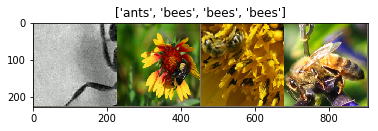

In [20]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(data_loaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])